# Explore here

In [305]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, f_regression
from joblib import dump
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv',
                           delimiter=',',
                           skipinitialspace=True,
                           engine='python')

dataframe.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [306]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [307]:
dataframe.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [308]:
if dataframe.isnull().sum().sum() > 0 or dataframe.isna().sum().sum():
    dataframe.dropna(axis=1, how=all, inplace=True).reset_index(drop=True)
    print("[+] There are missing values in the dataset")


if dataframe.duplicated().sum() > 0:
    dataframe.drop_duplicates(inplace=True)
    print("[+] There are duplicated values in the dataset")

dataframe = dataframe.select_dtypes(include=['float64', 'int64'])

dataframe.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,...,5827.242357,13.073503,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350
std,15150.559265,3.335834e+05,4.180730e+04,2.124081,4.228439e+04,1.815044,4.957773e+04,3.126297,4.899095e+04,1.696599,...,15720.551934,2.724351,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447
min,1001.000000,8.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.100000e+01,6.092789,...,7.000000,6.100000,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000
25%,18180.500000,1.096325e+04,1.280500e+03,10.594639,1.374500e+03,11.674504,1.263750e+03,10.496774,1.232750e+03,10.689322,...,815.000000,11.200000,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000
50%,29178.000000,2.580050e+04,3.057000e+03,11.802727,3.274000e+03,12.687422,3.108000e+03,11.772649,3.000500e+03,11.580861,...,1963.500000,12.800000,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000
75%,45081.500000,6.791300e+04,8.097000e+03,12.951840,8.822250e+03,13.659282,8.976250e+03,13.182260,8.314250e+03,12.639379,...,4727.000000,14.800000,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000
max,56045.000000,1.010552e+07,1.208253e+06,25.460677,1.239139e+06,23.304372,1.557073e+06,37.570198,1.501844e+06,22.225129,...,434075.000000,25.600000,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000


In [309]:
def identify_outliers(df):
    outlier_info = {}

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not outliers.empty:
            outlier_info[col] = {
                'outliers_count': outliers.shape[0],
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'outlier_values': outliers[col].tolist()
            }

    for col, info in outlier_info.items():
        print(f"Column: {col}")
        print(f"  Number of outliers: {info['outliers_count']}")
        print(f"  Low Limit: {info['lower_bound']}")
        print(f"  High Limit: {info['upper_bound']}")
        print(f"  Outliers: {info['outlier_values'][:5]}...\n")
    return outlier_info

In [310]:
def remove_outliers(df, outlier_info):
    
    for col, info in outlier_info.items():
        lower_limit = info['lower_bound']
        upper_limit = info['upper_bound']
        
        if lower_limit < 0:
            df = df[df[col] >= lower_limit]
        if upper_limit > 0:
            df = df[df[col] <= upper_limit]

        
    return df

In [311]:
outlier_info = identify_outliers(dataframe)

Column: TOT_POP
  Number of outliers: 432
  Low Limit: -74461.375
  High Limit: 153337.625
  Outliers: [218022, 659300, 163941, 366519, 413757]...

Column: 0-9
  Number of outliers: 429
  Low Limit: -8944.25
  High Limit: 18321.75
  Outliers: [24757, 83866, 19180, 43078, 53407]...

Column: 0-9 y/o % of total pop
  Number of outliers: 114
  Low Limit: 7.0588377662499955
  High Limit: 16.487640596250003
  Outliers: [6.360300542, 21.51954326, 19.6, 25.46067686, 17.2652804]...

Column: 19-Oct
  Number of outliers: 431
  Low Limit: -9797.125
  High Limit: 19993.875
  Outliers: [26913, 82823, 23398, 46922, 53561]...

Column: 10-19 y/o % of total pop
  Number of outliers: 137
  Low Limit: 8.697336139999999
  High Limit: 16.63644994
  Outliers: [6.569980779, 17.6438296, 8.665906499, 18.59568831, 16.95643485]...

Column: 20-29
  Number of outliers: 438
  Low Limit: -10305.0
  High Limit: 20545.0
  Outliers: [23579, 91855, 34582, 50959, 57388]...

Column: 20-29 y/o % of total pop
  Number of out

In [312]:
def remove_outliers(df, outlier_info):
    
    for col, info in outlier_info.items():
        lower_limit = info['lower_bound']
        upper_limit = info['upper_bound']
        
        if lower_limit < 0:
            df = df[df[col] >= lower_limit]
        if upper_limit > 0:
            df = df[df[col] <= upper_limit]

        
    return df

In [313]:
df_without_outliers = remove_outliers(dataframe.copy(), outlier_info=outlier_info)
df_without_outliers.describe().round(2)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,...,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00,1036.00
mean,28614.27,25643.53,2994.02,11.74,3250.41,12.66,3001.87,11.30,2949.89,11.31,...,1955.25,13.00,11.96,14.04,2571.90,3.44,3.19,3.72,675.62,5.00
std,13892.33,19858.18,2336.16,1.40,2545.34,1.19,2490.39,1.43,2369.07,1.04,...,1535.51,1.88,1.81,1.95,1969.30,0.36,0.33,0.39,508.77,1.28
min,1001.00,465.00,55.00,7.32,47.00,8.57,52.00,7.89,37.00,7.77,...,24.00,7.90,7.30,8.60,37.00,2.40,2.30,2.60,11.00,2.00
25%,18164.00,10870.00,1281.75,10.81,1384.75,11.92,1212.00,10.31,1204.00,10.62,...,797.50,11.60,10.60,12.58,1133.25,3.20,3.00,3.40,304.00,4.00
50%,27037.00,19995.50,2273.00,11.77,2543.50,12.67,2275.50,11.21,2253.50,11.23,...,1517.50,12.90,11.90,14.00,2045.50,3.40,3.20,3.70,537.00,6.00
75%,39383.00,35872.25,4192.75,12.60,4543.25,13.38,4161.50,12.04,4186.00,11.87,...,2690.50,14.40,13.32,15.50,3522.50,3.70,3.40,4.00,922.00,6.00
max,55141.00,117360.00,15330.00,16.40,16247.00,16.51,15146.00,16.89,16085.00,15.53,...,9070.00,18.80,17.40,20.20,11540.00,4.60,4.30,4.90,2805.00,6.00


In [314]:
def train_split(target, dataframe, test_size=0.2, random_state=42):
    return train_test_split(dataframe.drop(columns=target), dataframe[target], test_size=test_size, random_state=random_state)


In [315]:
def standard_scaler(X_train, X_test, filename: str):

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)

    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, f'../data/processed/std_transform_{filename}.sav')

    return X_train_norm, X_test_norm

def min_max_scaler(X_train, X_test, reference: str):
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, f'../data/processed/minmax_{reference}.sav')

    return X_train_minmax, X_test_minmax


In [316]:
TARGET = 'diabetes_prevalence'

X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_split(TARGET, dataframe, test_size=0.2, random_state=42)
X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers  = train_split(TARGET, df_without_outliers, test_size=0.2, random_state=42)

#Default
X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers_ts_02_rs_42.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers_ts_02_rs_42.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

#Without outliers
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers_ts_02_rs_42.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers_ts_02_rs_42.csv', index=False)

y_train_without_outliers.to_csv('../data/processed/y_train_without_outliers.csv', index=False)
y_test_without_outliers.to_csv('../data/processed/y_test_without_outliers.csv', index=False)

In [317]:
X_train_with_outliers_std, X_test_with_outliers_std = standard_scaler(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_std, X_test_without_outliers_std = standard_scaler(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_with_outliers_minmax, X_test_with_outliers_minmax = min_max_scaler(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = min_max_scaler(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

In [318]:
def select_k_best(X_train, X_test, y_train, k, filename: str):

    selection_model = SelectKBest(f_regression, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    dump(selection_model, f'../data/processed/selection_model_{filename}.sav')

    return pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) , pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

In [319]:
K=15
X_train_with_outliers_selected, X_test_with_outliers_selected = select_k_best(X_train_with_outliers, X_test_with_outliers, y_train, K, 'with_outliers')
X_train_without_outliers_selected, X_test_without_outliers_selected = select_k_best(X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, K, 'without_outliers')

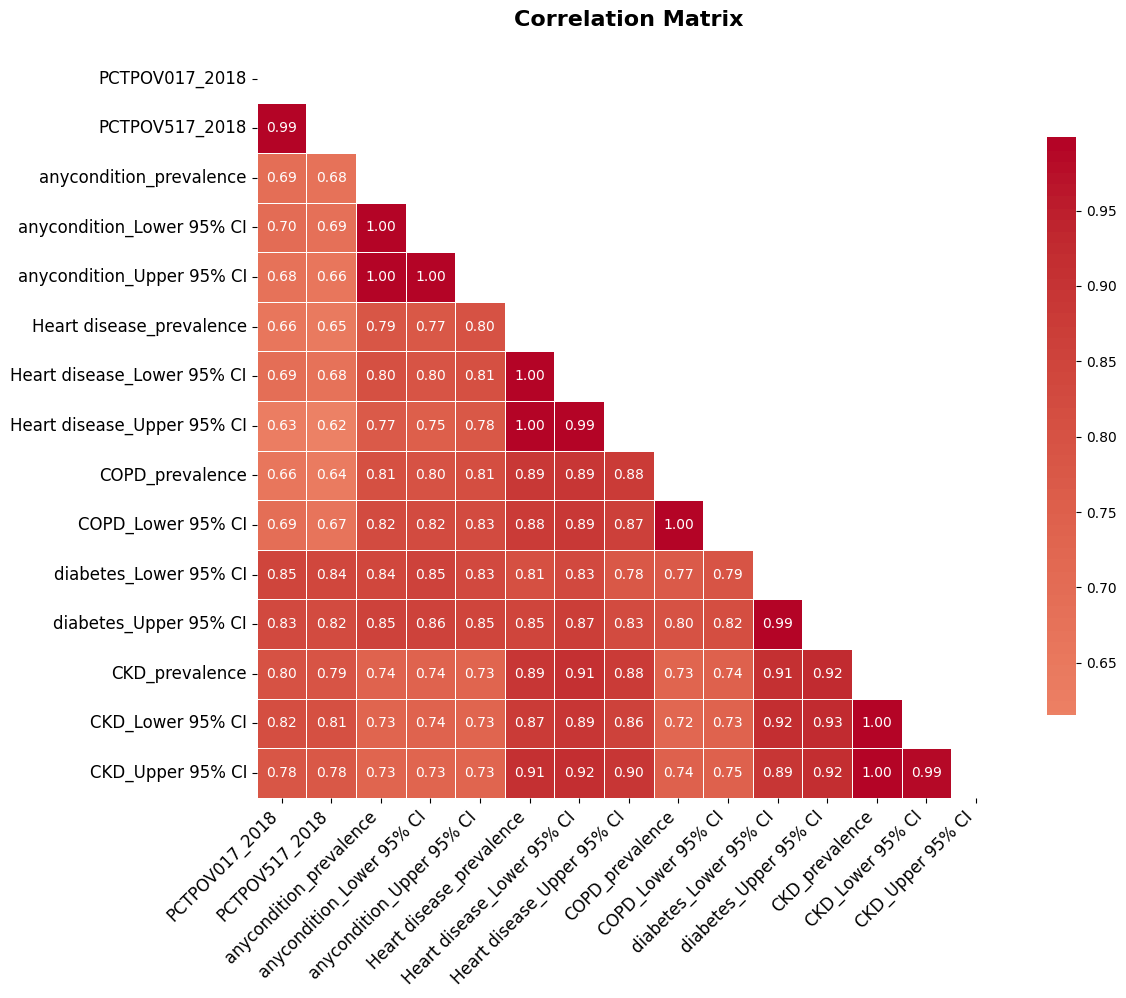

In [320]:
# Correlation heatmap

import numpy as np
import seaborn as sns

plt.figure(figsize=(12, 10))

corr_matrix = X_train_with_outliers_selected.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True, 
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10}
)

plt.title("Correlation Matrix", fontsize=16, fontweight="bold", pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

plt.show()

In [321]:
X_train_with_outliers_std_selected = X_train_with_outliers_std[X_train_with_outliers_selected.columns]
X_train_without_outliers_std_selected = X_train_without_outliers_std[X_train_without_outliers_selected.columns]

X_test_with_outliers_std_selected = X_test_with_outliers_std[X_test_with_outliers_selected.columns]
X_test_without_outliers_std_selected = X_test_without_outliers_std[X_test_without_outliers_selected.columns]


X_train_with_outliers_minmax_selected = X_train_with_outliers_minmax[X_train_with_outliers_selected.columns]
X_train_without_outliers_minmax_selected = X_train_without_outliers_minmax[X_train_without_outliers_selected.columns]

X_test_with_outliers_minmax_selected = X_test_with_outliers_minmax[X_test_with_outliers_selected.columns]
X_test_without_outliers_minmax_selected = X_test_without_outliers_minmax[X_test_without_outliers_selected.columns]

In [322]:
dfs_train = {
    'X_train_with_outliers_selected': X_train_with_outliers_selected,
    'X_train_with_outliers_std_selected': X_train_with_outliers_std_selected,
    'X_train_with_outliers_minmax_selected': X_train_with_outliers_minmax_selected,
}

dfs_train_without_outliers = {
    'X_train_without_outliers_selected': X_train_without_outliers_selected,
    'X_train_without_outliers_std_selected': X_train_without_outliers_std_selected,
    'X_train_without_outliers_minmax_selected': X_train_without_outliers_minmax_selected 
}

dfs_test = {
    'X_test_with_outliers_selected': X_test_with_outliers_selected,
    'X_test_with_outliers_std_selected': X_test_with_outliers_std_selected,
    'X_test_with_outliers_minmax_selected': X_test_with_outliers_minmax_selected,
}

dfs_test_without_outliers = {
    'X_test_without_outliers_selected': X_test_without_outliers_selected,
    'X_test_without_outliers_std_selected': X_test_without_outliers_std_selected,
    'X_test_without_outliers_minmax_selected': X_test_without_outliers_minmax_selected
}



for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

for name, df in dfs_train_without_outliers.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test_without_outliers.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

In [323]:
train = list(dfs_train.values())
test = list(dfs_test.values())
train_without_outliers = list(dfs_train_without_outliers.values())
test_without_outliers = list(dfs_test_without_outliers.values())

results = []

# Default
for index, train_df in enumerate(train):
    model = LinearRegression()
    model.fit(train_df, y_train)
    y_pred = model.predict(test[index])

    results.append({
        'index': index,
        'df_train': list(dfs_train.keys())[index],
        'Intercept': model.intercept_,
        'Coefficients': model.coef_,
        'y_pred': y_pred
    })

# Without outliers
for index, train_df in enumerate(train_without_outliers):
    model = LinearRegression()
    model.fit(train_df, y_train_without_outliers)
    y_pred = model.predict(test_without_outliers[index])

    results.append({
        'index': index,
        'df_train': list(dfs_train_without_outliers.keys())[index],
        'Intercept': model.intercept_,
        'Coefficients': model.coef_,
        'y_pred': y_pred
    })


results = sorted(results, key=lambda x: x['Intercept'], reverse=True)
best_result = results[0]

print(f"Index: {best_result['index']}")
print(f"\ndf_train: {best_result['df_train']}")
print(f"\nIntercept: {best_result['Intercept']}")
print(f"\nCoefficients: {best_result['Coefficients']}")


Index: 1

df_train: X_train_with_outliers_std_selected

Intercept: 13.041640127388533

Coefficients: [-0.00398128  0.00288812  0.74996791 -0.37751348 -0.36826725  0.36820115
 -0.09668548 -0.27807018  0.11896858 -0.11753558  1.28182026  1.40929728
  0.01180163 -0.01001318  0.00470785]


In [324]:
print(f"Mean squared error: {mean_squared_error(y_test, best_result['y_pred']):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, best_result['y_pred']):.2f}")

Mean squared error: 0.00
Coefficient of determination: 1.00


In [325]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, -1],
    'positive': [True, False]
}

grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_with_outliers_std_selected, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R² Score: {grid_search.best_score_}")



Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best R² Score: 0.9997543137195558


In [326]:
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test_with_outliers_std_selected)
print(f"Test Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"Test Coefficient of Determination: {r2_score(y_test, y_pred_test):.4f}")

Test Mean Squared Error: 0.0019
Test Coefficient of Determination: 0.9998



Lasso Regression:
Alpha: 0.1 | MSE: 0.0142 | R²: 0.9982
Alpha: 0.5 | MSE: 0.2848 | R²: 0.9646
Alpha: 1.0 | MSE: 1.1236 | R²: 0.8603
Alpha: 2.0 | MSE: 4.4691 | R²: 0.4444
Alpha: 5.0 | MSE: 8.0685 | R²: -0.0032
Alpha: 10.0 | MSE: 8.0685 | R²: -0.0032
Alpha: 50.0 | MSE: 8.0685 | R²: -0.0032
Alpha: 100.0 | MSE: 8.0685 | R²: -0.0032
Best model saved with alpha=0.1 and R²=0.9982


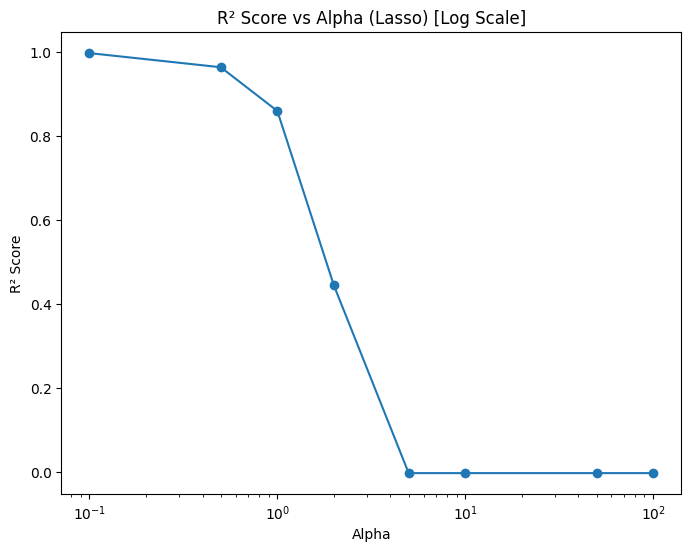

In [327]:
import joblib


alphas = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 50.0, 100.0]

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_with_outliers_std_selected, y_train)
y_pred = lasso_model.predict(X_test_with_outliers_std_selected)

r2_scores = []
print("\nLasso Regression:")
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_with_outliers_std_selected, y_train)
    y_pred = lasso_model.predict(X_test_with_outliers_std_selected)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"Alpha: {alpha} | MSE: {mean_squared_error(y_test, y_pred):.4f} | R²: {r2:.4f}")

best_alpha = alphas[r2_scores.index(max(r2_scores))]
joblib.dump(Lasso(alpha=best_alpha).fit(X_train_with_outliers_std_selected, y_train), f'../models/best_lasso_alpha_{best_alpha}.pkl')
print(f"Best model saved with alpha={best_alpha} and R²={max(r2_scores):.4f}")

plt.figure(figsize=(8, 6))
plt.xscale('log')
plt.plot(alphas, r2_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs Alpha (Lasso) [Log Scale]')    
plt.show()


High R² Scores for Low Alpha: At lower values of Alpha (closer to 10−110^{-1}), the R² score is close to 1, indicating a very good fit of the model.

Decline in R² with Increasing Alpha: As Alpha increases, the R² score decreases significantly. This trend continues, with R² approaching 0 for Alphas greater than 10010^{0} (1).